<a href="https://colab.research.google.com/github/GerardoxCarreon/FisicaComputacional1/blob/master/Evaluacion2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Evaluación 2***
"Resolviendo Ecuaciones Diferenciales Ordinarias con Python" 

---

Esta evaluación consiste en resolver numéricamente la ecuación diferencial de un oscilador armónico amortiguado forzado con una fuerza de tipo sinoidal, con ayuda de la función odeint de scipy.integrate

In [6]:
#Aqui introducimos las bibliotecas a utilizar
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d
from scipy import integrate, linalg
import pylab as plt
import math as math



%matplotlib inline

*   # ***Problema 1.*** 

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) < 0, x'(0) = 0$. 

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $zeta$:

\
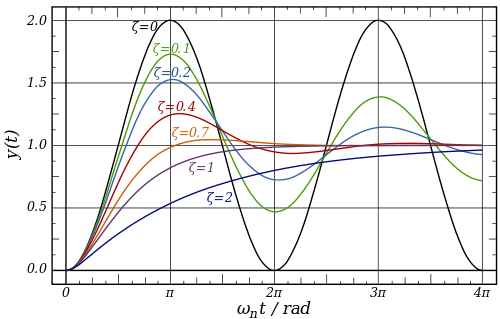

In [12]:
#Lo primero que debemos hacer es descomponer la ecuación diferencial de segundo grado en dos de primer grado, de esta manera podremos resolver el problema más rapido

$$\begin{equation*}
\frac{d x}{d t} = v\\
\frac{d v}{d t} = - 2 \zeta \omega_n v-\omega_n^2 x 
\end{equation*}$$

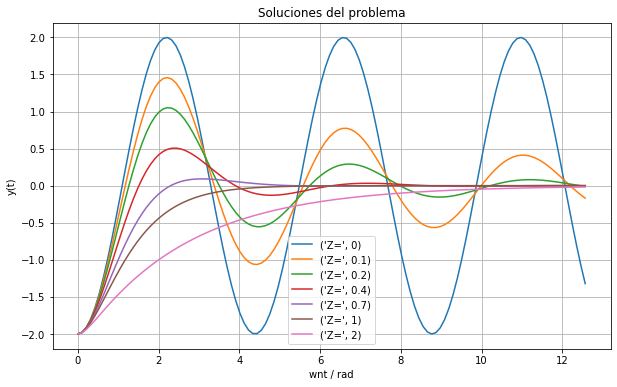

In [17]:
#Ahora, para solucionar la ecuacion diferencial dada por el problema es necesario definir las condiciones iniciales de este
#Definimos las condiciones iniciales:
 
#Amoriguamiento
m=1          
#Frecuencia angular
k=9
#Coeficiente de viscosidad
c=0.0000174     
#La frecuencia angular de la oscilación amortiguada es
wn=math.sqrt(k/m)
Z=math.sqrt((c)/(2*math.sqrt(m*k)))
#Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

#Definimos el vector X
def dX_dt(X, t=1):
    return np.array([X[1],-2*Z*wn*X[1]-(wn**2)*X[0]])

#Calculamos los puntos criticos
X_f0 = np.array([0. ,0.])
all(dX_dt(X_f0)==np.zeros(2))

#Calculamos las soluciones numericas del problema
t = np.linspace(0, 4*np.pi, 120)
A=(wn*t)/(2*np.pi)
#Condiciones iniciales
X_0=np.array([-2,0])   
#Dimensiones de la gráfica                
plt.figure(figsize=(10,6));

#Definimos los distintos valores que tomara Z
for Z in [0 , 0.1, 0.2, 0.4, 0.7, 1, 2]:
  X, infodict = integrate.odeint(dX_dt, X_0, A, full_output=True
                                 , atol=abserr, rtol=relerr)
  x,y=X.T 
  plt.plot(t, x, label=("Z=",Z));

#Gráficamos las soluciones
#Imprimimos leyenda y titulo de la gráfica
plt.grid();
plt.legend(loc='best');
plt.xlabel('wnt / rad');
plt.ylabel('y(t)');
plt.title('Soluciones del problema');
plt.show();


*   # ***Problema 2.*** 
Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$).

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

\
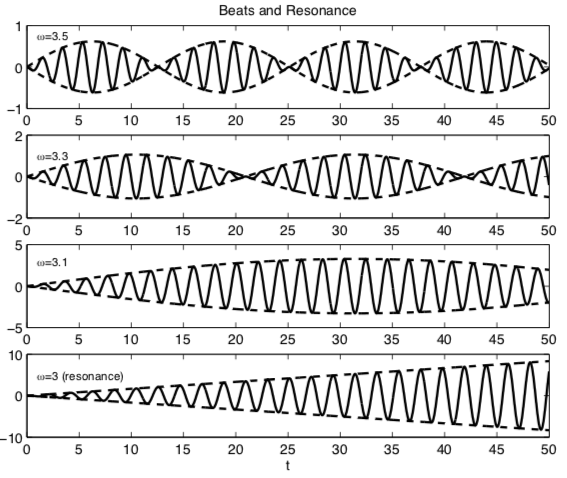

In [13]:
#Lo primero que debemos hacer es descomponer la ecuación diferencial de segundo grado en dos de primer grado, de esta manera podremos resolver el problema más rapido

$$\begin{equation*}
\frac{d x}{d t} = v \\
\frac{d v}{d t} =\frac{1}{m } F_0 \sin(\omega t)  - \omega_n^2 x 
\end{equation*}$$

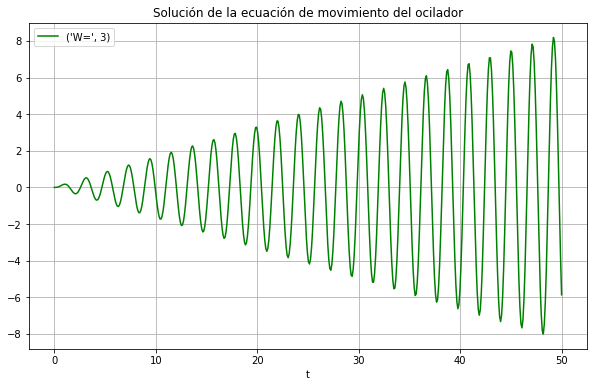

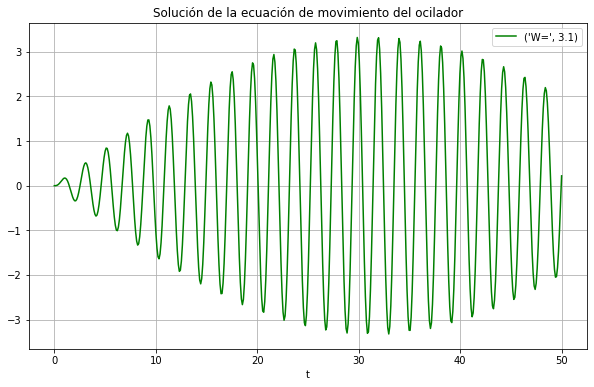

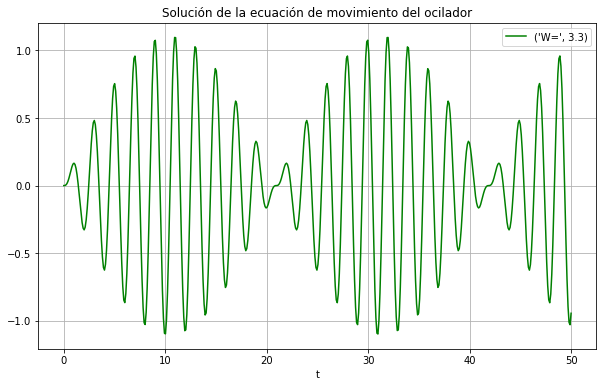

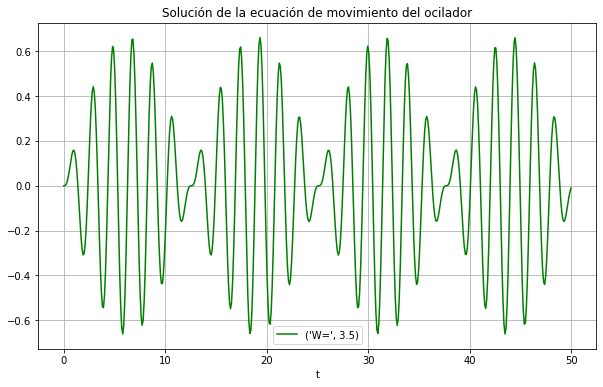

In [18]:
#Ahora, para solucionar la ecuacion diferencial dada por el problema es necesario definir las condiciones iniciales de este
#Definimos las condiciones iniciales:
 
#Amoriguamiento
m=1          
#Frecuencia angular
k=9
#Coeficiente de viscosidad
c=0.0000174  
#Forzamiento
F0=1   
#La frecuencia angular de la oscilación amortiguada es
wn=math.sqrt(k/m)

#Calculamos las soluciones numericas del problema
t=np.linspace( 0, 50, 500 )
# Condiciones iniciales
X_0=np.array([0, 0])                     

#Definimos los distintos valores que tomara W
for W in [3, 3.1, 3.3, 3.5]:

#Definimos el vector X
  def dX_dt(X, t=1):
      return np.array([X[1], (1/m)*F0*math.sin(W*t)-(wn**2)*X[0]])

  X, infodict = integrate.odeint(dX_dt, X_0, t, full_output=True)
  x, y = X.T

#Gráficamos las soluciones
#Imprimimos leyenda y titulo de la gráfica
  plt.figure(figsize=(10,6))
  print()
  plt.plot( t, x, 'g', label=('W=', W))
  plt.legend(loc='best')
  plt.title('Solución de la ecuación de movimiento del ocilador')
  plt.xlabel('t')
  plt.grid()
  plt.show()

*   # ***Problema 3.*** 
Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$.

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado.



In [16]:
#Lo primero que debemos hacer es descomponer la ecuación diferencial de segundo grado en dos de primer grado, de esta manera podremos resolver el problema más rapido

$$\begin{equation*}
\frac{d x}{d t} = v \\
\frac{d^2 x}{d t^2} = \frac{1}{m } F_0 \sin(\omega t) - 2 \zeta \omega_n \frac{dx}{dt}-\omega_n^2 x
\end{equation*}$$

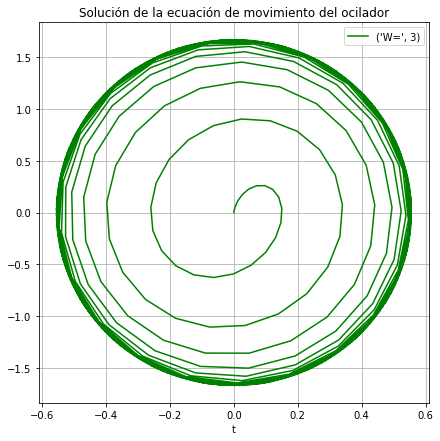

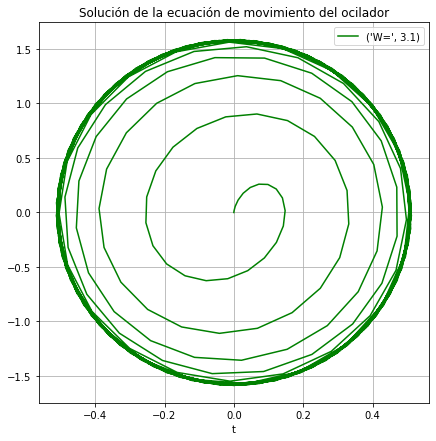

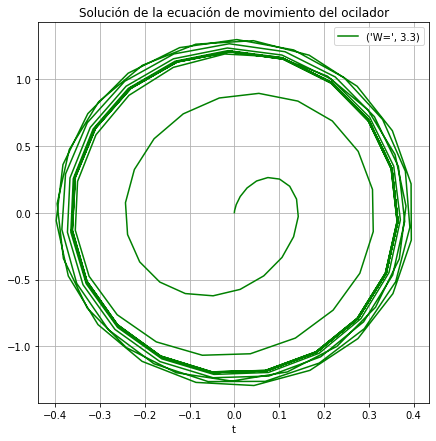

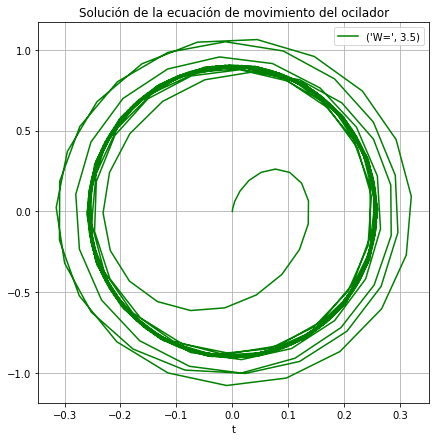

In [20]:
#Ahora, para solucionar la ecuacion diferencial dada por el problema es necesario definir las condiciones iniciales de este
#Definimos las condiciones iniciales:
 
#Amoriguamiento
m=1          
#Frecuencia angular
k=9
#Coeficiente de viscosidad
c=0.0000174  
#Forzamiento
F0=1   
#La frecuencia angular de la oscilación amortiguada es
wn=math.sqrt(k/m)
#Coeficiente de amortiguamiento
Z=0.1

#Definimos los errores de tolerancia para la solución
abserr = 1.0e-8
relerr = 1.0e-6

#Calculamos los puntos criticos
X_f0 = np.array([0. , 0.])
all(dX_dt(X_f0) == np.zeros(2) )

#Calculamos la solución numerica del problema
#Definimos las condiciones iniciales
X_0 = np.array([0, 0])                     

#Definimos los distintos valores que tomara W
for W in [3,3.1,3.3,3.5]:

#Definimos el vector X
  def dX_dt(X, t=1):
      return np.array([X[1], (1/m)*F0*math.sin(W*t)-2*Z*wn*X[1]-(wn**2)*X[0]])

  X, infodict = integrate.odeint(dX_dt, X_0, t, full_output=True)
  x, y = X.T

#Gráficamos las soluciones
#Imprimimos leyenda y titulo de la gráfica
  plt.figure(figsize=(7,7))
  print()
  plt.plot( x, y , 'g', label=('W=', W))
  plt.legend(loc='best')
  plt.title('Solución de la ecuación de movimiento del ocilador')
  plt.xlabel('t')
  plt.grid()
  plt.show()